## Final Phase 3 Project Submission

Please fill out: 
* Student name: **Alberto SYLVEUS** 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: **Wedter JEROME**
*  
[Click here to get the github repository](https://github.com/tolly00/Phase-3-project.git)

## Overview

A telecommunication company, his mame is **SyriaTel**, he wants to be informed whether a customer will ("soon") stop doing business with him.

## Busineess Undertanding

**SyriaTel**, a telecommunications company, is facing a challenge common in the industry: customer churn. Churn occurs when a customer terminates their contract or stops using the company’s services. Retaining existing customers is usually more cost-effective than acquiring new ones, so predicting churn is a high business priority.

The goal is to build a predictive model that can identify customers who are at risk of leaving SyriaTel in the near future. This will enable the company to take proactive actions (such as offering promotions, improved support, or loyalty programs) to retain those customers.

## Data Understanding

In this section, we are going to look at customer dataset to identify data quality issues, and gain initial insights that will help guide the modeling process.

In this dataset, we have historical customer information, with features such as:
- **state**: the state the customer lives in
- **account length**: the number of days the customer has had an account
- **area code**: the area code of the customer
- **phone number**: the phone number of the customer
- **international plan**: true if the customer has the international plan, otherwise false
- **voice mail plan**: true if the customer has the voice mail plan, otherwise false
- **number vmail messages**: the number of voicemails the customer has sent
- **total day minutes**: total number of minutes the customer has been in calls during the day
- **total day calls**: total number of calls the user has done during the day
- **total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day
- **total eve minutes**: total number of minutes the customer has been in calls during the evening
- **total eve calls**: total number of calls the customer has done during the evening
- **total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening
- **total night minutes**: total number of minutes the customer has been in calls during the night
- **total night calls**: total number of calls the customer has done during the night
- **total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night
- **total intl minutes**: total number of minutes the user has been in international calls
- **total intl calls**: total number of international calls the customer has done
- **total intl charge**: total amount of money the customer was charged by the Telecom company for international calls
- **customer service calls**: number of calls the customer has made to customer service
- **churn**: true if the customer terminated their contract, otherwise false 

This dataset has **3333 rows** and **21 columns**.

## Data Preparation

In [7]:
# Import module and package...

# data manipulation
import pandas as pd
import numpy as np

# data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [8]:
# load data from csv file
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.duplicated().sum() # duplicate rows check

0

In [10]:
df.isnull().sum() # check if missing values exist

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Let's check the number of unique values in all columns to find **feature type**.

In [12]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [13]:
# Let's drop phone number this is a irrelevant feature
df.drop(['phone number'],axis=1,inplace=True)
df.shape

(3333, 20)

We can see that we have `continues features`(numeric values with an infinite number of possible values) and `categoricals features`(values that have a finite number of categories).

In [14]:
# let's make a list for each continous and categorical features.

num_features = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

group_features = ['state','area code','international plan','voice mail plan']

## Modeling

In [15]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Check
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
# 4. Split features & target
X = df.drop("churn", axis=1)
y = df["churn"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2333, 19)
Test size: (1000, 19)


In [17]:
# 5. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# 6. Train a Logistic Regression model (simple but effective for binary classification)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# 7. Make predictions
y_pred = model.predict(X_test_scaled)

In [20]:
# 8. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.864
Precision: 0.5671641791044776
Recall: 0.2620689655172414
F1 Score: 0.35849056603773594

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.92       855
        True       0.57      0.26      0.36       145

    accuracy                           0.86      1000
   macro avg       0.73      0.61      0.64      1000
weighted avg       0.84      0.86      0.84      1000



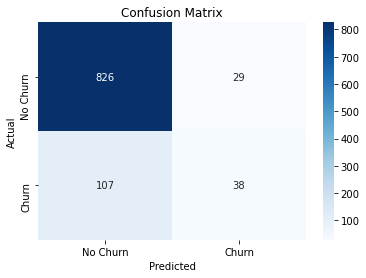

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# 9. Interpret feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
18,customer service calls,0.693060
3,international plan,0.593297
5,number vmail messages,0.455115
6,total day minutes,0.315245
8,total day charge,0.311930
9,total eve minutes,0.178820
11,total eve charge,0.178750
17,total intl charge,0.165764
15,total intl minutes,0.099241
14,total night charge,0.075845


## Evaluation